<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Binary_Logistic_Regression_Klasifikasi_Biner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
#   Memuat & Menyiapkan Data ---
data = load_breast_cancer()
X, y = data.data, data.target

In [3]:
# Skala fitur agar performa model lebih baik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
#   Latih Model Logistic Regression ---
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [6]:
#   Prediksi & Evaluasi ---
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas positif

In [7]:
# Mencetak 2+ hasil evaluasi
print("======= Laporan Klasifikasi =======")
print(classification_report(y_test, y_pred, target_names=data.target_names))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

======= Laporan Klasifikasi =======
              precision    recall  f1-score   support

   malignant       0.97      0.98      0.98        63
      benign       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

ROC AUC Score: 0.9981


In [8]:
#   Tampilkan 2 Visualisasi ---
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(50.722222222222214, 0.5, 'Aktual')

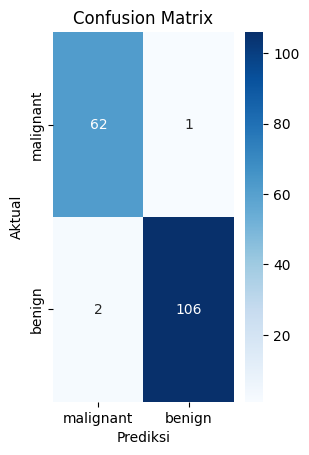

In [9]:
# Visual 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

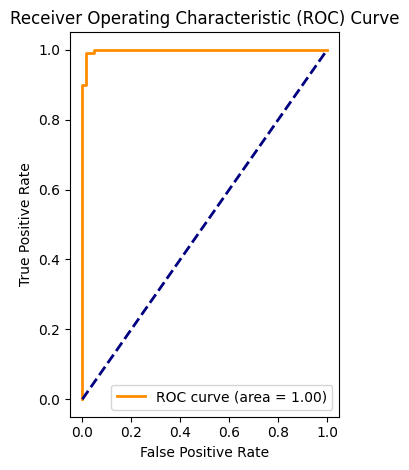

In [10]:
# Visual 2: ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()